# Regression and Classification Review

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('seaborn-white')

from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.datasets import load_boston, load_breast_cancer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict

from ipywidgets import interact, IntSlider, FloatSlider

In [2]:
boston = load_boston()

In [3]:
X = boston.data
y = boston.target

In [4]:
df = pd.DataFrame(X, columns=boston.feature_names)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


### Basic Linear Regression

- `train_test_split`
- `mean_squared_error`
- `cross_val_score`

In [6]:
x = df.CRIM.values.reshape(-1,1)
y = y
X_train, X_test, y_train, y_test = train_test_split(x, y)

In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(pred, y_test)
np.sqrt(mse)

8.1759513679407583

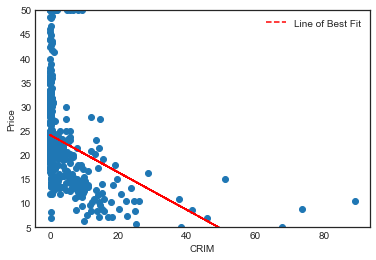

In [8]:
plt.scatter(x, y)
plt.plot(x, lr.predict(x), '--k', color = 'red', label = 'Line of Best Fit')
plt.ylim(min(y), max(y))
plt.legend()
plt.xlabel('CRIM')
plt.ylabel('Price')

### Polynomial Features

In [18]:
PolynomialFeatures?

In [9]:
a = np.array([i for i in range(20)])
b = np.array([(i**2 + 100*np.random.random(1)) for i in range(20)])
def plotter(n):
    p = PolynomialFeatures(n)
    p2 = p.fit_transform(a.reshape(-1,1))
    lr.fit(p2, b)
    pred = lr.predict(p2)a
    mse = mean_squared_error(pred, b)
    plt.figure(figsize = (8, 5))
    plt.plot(a, pred, '-o')
    plt.plot(a, b, 'o')
    print('MSE: ', mse, '\nRMSE: ', np.sqrt(mse))

MSE:  554.086007346 
RMSE:  23.539031572


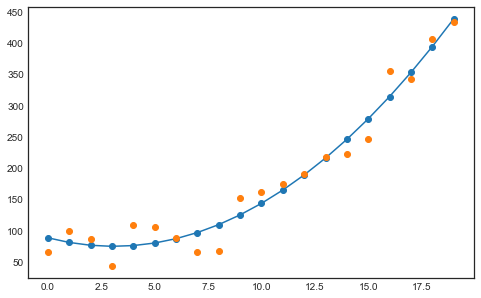

In [10]:
plotter(2)

<function __main__.plotter>

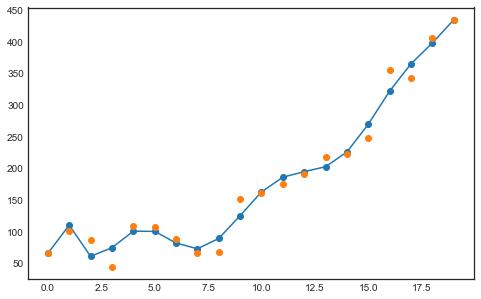

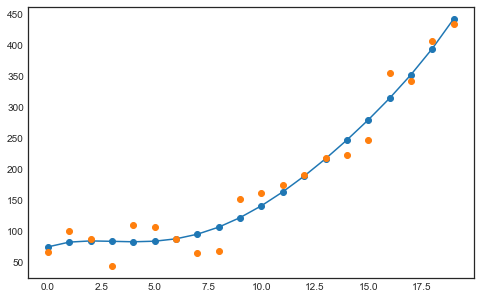

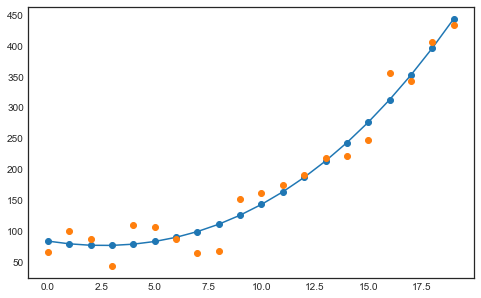

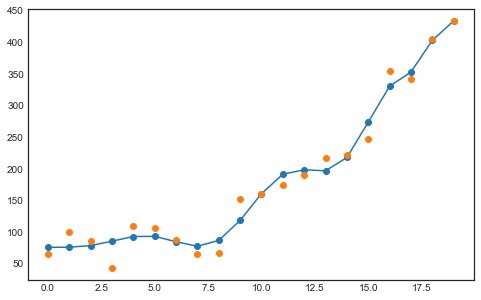

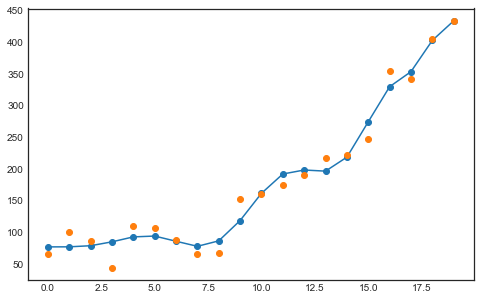

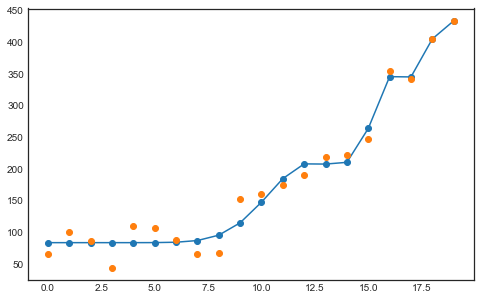

In [20]:
interact(plotter, n = (0, 20, 1))

In [22]:
x = df.CRIM.values.reshape(-1,1)
y = y
def plotter_df(n):
    p = PolynomialFeatures(n)
    p2 = p.fit_transform(x)
    lr.fit(p2, y)
    pred = lr.predict(p2)
    plt.figure(figsize = (10, 6))
    plt.plot(x, pred, 'o')
    plt.plot(x, y, 'o')

<function __main__.plotter_df>

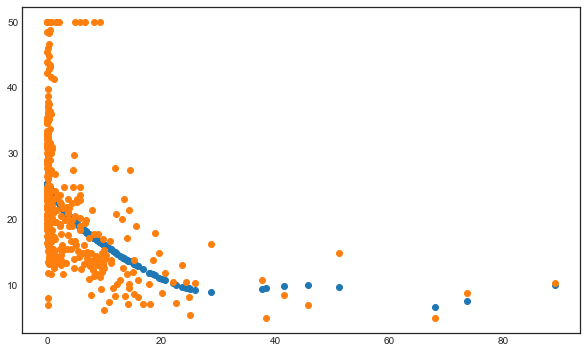

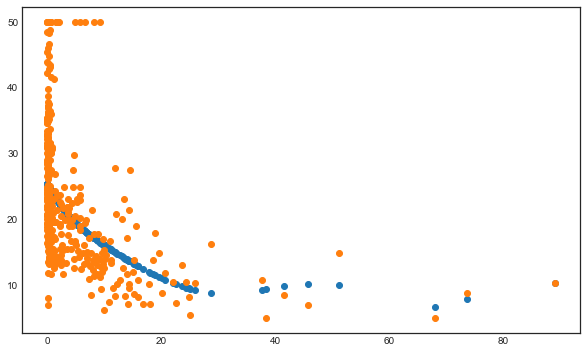

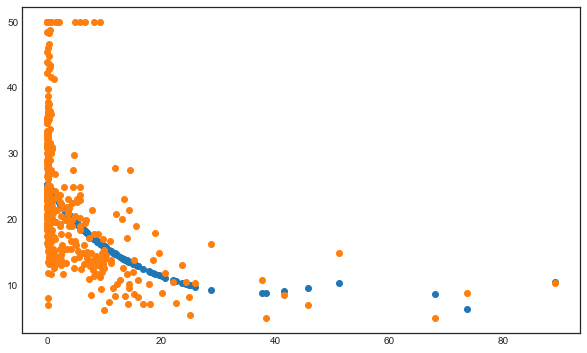

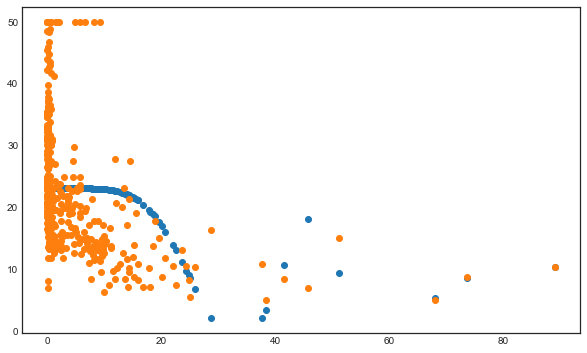

In [23]:
interact(plotter_df, n = (1, 16, 1))

In [24]:
pipereg = make_pipeline(PolynomialFeatures(), LinearRegression())
param = {'polynomialfeatures__degree': [i for i in range(1, 6)]}
grid = GridSearchCV(pipereg, param_grid=param)
grid.fit(X_train, y_train)
pred = grid.best_estimator_.predict(X_test)
print('\nThe best estimator here was a polynomial of degree: ', grid.best_estimator_.named_steps.polynomialfeatures.degree, '\nwith RMSE :', np.sqrt(mean_squared_error(pred, y_test)))


The best estimator here was a polynomial of degree:  2 
with RMSE : 9.390510624267682


### Regularization: Ridge, LASSO, Elastic Net

In [25]:
piperidge = make_pipeline(StandardScaler(), PolynomialFeatures(), Ridge())
params = {'ridge__alpha': [0.1, 1, 5, 10, 100, 1000], 'polynomialfeatures__degree': [i for i in range(1, 6)]}
gridridge = GridSearchCV(piperidge, param_grid=params)
gridridge.fit(X_train, y_train)
pred = gridridge.best_estimator_.predict(X_test)
print('\nThe best estimator here was a model with alpha: ', gridridge.best_estimator_.named_steps.ridge.alpha, '\ngiving us an RMSE :', np.sqrt(mean_squared_error(pred, y_test)))


The best estimator here was a model with alpha:  1 
giving us an RMSE : 9.30674458958908


In [26]:
pipelasso = make_pipeline(StandardScaler(), PolynomialFeatures(), Lasso(max_iter = 1000000))
params = {'lasso__alpha': [0.1, 1, 5, 10, 100, 1000], 'polynomialfeatures__degree': [i for i in range(1, 6)]}
gridlasso = GridSearchCV(pipelasso, param_grid=params, cv = 5)
gridlasso.fit(X_train, y_train)
pred = gridlasso.best_estimator_.predict(X_test)
print('\nThe best estimator here was a model with alpha: ', gridlasso.best_estimator_.named_steps.lasso.alpha, '\ngiving us an RMSE :', np.sqrt(mean_squared_error(pred, y_test)))


The best estimator here was a model with alpha:  0.1 
giving us an RMSE : 9.330747546695047


In [27]:
pipeenet = make_pipeline(StandardScaler(), PolynomialFeatures(), ElasticNet(max_iter=1000000))
params = {'elasticnet__alpha': [0.1, 1, 5, 10, 100, 1000], 'polynomialfeatures__degree': [i for i in range(1, 6)]}
gridenet = GridSearchCV(pipeenet, param_grid=params)
gridenet.fit(X_train, y_train)
pred = gridenet.best_estimator_.predict(X_test)
print('\nThe best estimator here was a model with alpha: ', gridenet.best_estimator_.named_steps.elasticnet.alpha, '\ngiving us an RMSE :', np.sqrt(mean_squared_error(pred, y_test)))


The best estimator here was a model with alpha:  0.1 
giving us an RMSE : 9.38331967045253


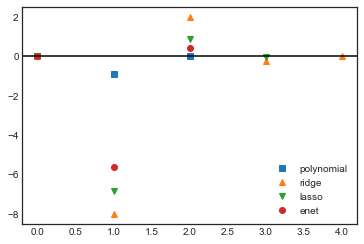

In [31]:
plt.plot(grid.best_estimator_.named_steps.linearregression.coef_, 's', label = 'polynomial')
plt.plot(gridridge.best_estimator_.named_steps.ridge.coef_, '^', label = 'ridge')
plt.plot(gridlasso.best_estimator_.named_steps.lasso.coef_, 'v', label = 'lasso')
plt.plot(gridenet.best_estimator_.named_steps.elasticnet.coef_, 'o', label = 'enet')
plt.axhline(color = 'black')
plt.legend(loc = 'best')